In [6]:
import numpy as np
import random as random
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf)

In [15]:
def inicializeRMatrix(numRows, numCols):
    return np.array([-1 for _ in range((numRows**2)*(numCols**2))]).reshape(numRows**2, numCols**2)

In [16]:
size = int(input('¿Cuál es el tamaño del problema? '))
num_col = size
num_fil = size
states = (num_col*num_fil)**2

¿Cuál es el tamaño del problema?  5


In [17]:
objetivo = int(input('¿Cuál es el estado objetivo?'))

¿Cuál es el estado objetivo? 8


# Cálculo del tablero

Inicializamos la Matriz tablero primero. Para ello, según hemos observado en el ejemplo, lo valores del tablero se incrementan por lo que hemos denominado __capas__:


    -Capa 0: 
            [0]
    -Capa 1: 
            [0  3]
            [1  2]
    -Capa 2:
            [0  3  8]
            [1  2  7]
            [4  5  6]
    -Capa 3: 
            [ 0   3   8  15]
            [ 1   2   7  14]
            [ 4   5   6  13]
            [ 9  10  11  12]
    -Capa n:
            [ 0      3      8     15    .  (n^2)+2n  ]
            [ 1      2      7     14    .  (n^2)+2n-1]
            [ 4      5      6     13    .  (n^2)+2n-2]
            [ 9     10     11     12    .  (n^2)+2n-3]
              .      .      .      .    .      .
            [n^2 (n^2)+1 (n^2)+2 (n^2)+3.    (n^2)+n ]

Para su simplificación, hemos decidido cambiar la orientación propuesta en el enunciado del problema. Los resultados obtenidos en la matriz Q no van a variar de ninguna forma, lo único es que la matriz obtenida estaría desplazada __90º__ respecto de la original.

Para modular el código hemos separado la función que ejecuta el bucle __n__ veces (n = número de capas que queramos en la matriz) 

In [12]:
def createMatrix(m,tam):
    layer=0
    for i in range(tam):
        [m,layer]=addLayerToMatrix(m,i,layer)
    return m

Y la función que añade una capa más a la matriz

In [13]:
def addLayerToMatrix(matrix, layer, count):
    for i in range(layer):
        
        matrix[layer][i] = int(count)
        count=count+1
        
    for i in range(layer+1):
        
        matrix[layer-i][layer] = int(count)
        count=count+1
    
    return [matrix, count]

De ahí procedemos a crear el tablero deseado según el valor que hayamos introducido al principio del documento 

In [14]:
zeroMatrix= np.zeros((num_fil,num_col))
tablero = createMatrix(zeroMatrix,size).astype(int)
print(tablero)

[[ 0  3  8 15 24]
 [ 1  2  7 14 23]
 [ 4  5  6 13 22]
 [ 9 10 11 12 21]
 [16 17 18 19 20]]


# Cálculo de la matriz R

Una vez creado el tablero procederemos al calculo de la matriz R. Para ello nos basaremos en las posiciones de la matriz tablero. En esta ocasión los únicos movimientos válidos son los movimientos perpendiculares y diagonales. 

Para que la matriz obtenida no tenga en cuenta los espacios fuera del tablero, tenemos que controlar los movimientos en los bordes del tablero. Dicho de otra forma controlamos cuando cualquiera de los índices del bucle se encuentra en la posición 0 o en la posición máxima menos 1.

Cuando los índices se encuentren entre los valores mencionados en el párrafo anterior no existe restricción, menos que no puede ir a sí mismo. Esto último lo hemos decidido para que el entrenamiento de la matriz Q se ejecute de la forma más rápido posible.

In [18]:
#Este método obtiene automáticamente la Matriz R a partir del tablero (m) introducido por el usuario
def obtainRMatrix(m):
    Rsize = size**2
    rMatrix = inicializeRMatrix(num_col,num_fil)
    res=[]
    for i in range(num_fil):
        for j in range(num_col):
            n0 = m[i][j]
            if 0<i<num_fil-1:
                rMatrix[m[i][j]][m[i-1][j]]=0
                rMatrix[m[i][j]][m[i+1][j]]=0
                
                if(0<j<num_col-1):
                    rMatrix[m[i][j]][m[i-1][j-1]]=0
                    rMatrix[m[i][j]][m[i][j-1]]=0
                    rMatrix[m[i][j]][m[i-1][j+1]]=0
                    rMatrix[m[i][j]][m[i+1][j-1]]=0
                    rMatrix[m[i][j]][m[i+1][j+1]]=0
                    rMatrix[m[i][j]][m[i][j+1]]=0
                    
                if(j==0):
                    rMatrix[m[i][j]][m[i-1][j+1]]=0
                    rMatrix[m[i][j]][m[i][j+1]]=0
                    rMatrix[m[i][j]][m[i+1][j+1]]=0
                    
                if(j==num_col-1):
                    rMatrix[m[i][j]][m[i-1][j-1]]=0
                    rMatrix[m[i][j]][m[i][j-1]]=0
                    rMatrix[m[i][j]][m[i+1][j-1]]=0  
                    
            elif(i==0):
                rMatrix[m[i][j]][m[i+1][j]]=0             
                
                if(j==0):
                    rMatrix[m[i][j]][m[i+1][j+1]]=0             
                    rMatrix[m[i][j]][m[i][j+1]]=0   
                    
                if(j==num_col-1):
                    rMatrix[m[i][j]][m[i+1][j-1]]=0  
                    rMatrix[m[i][j]][m[i][j-1]]=0 
                    
                if(0<j<num_col-1):
                    rMatrix[m[i][j]][m[i+1][j-1]]=0  
                    rMatrix[m[i][j]][m[i+1][j+1]]=0  
                    rMatrix[m[i][j]][m[i][j+1]]=0  
                    rMatrix[m[i][j]][m[i][j-1]]=0  
                    
            elif i==num_fil-1:
                rMatrix[m[i][j]][m[i-1][j]]=0  
                if(j==0):
                    rMatrix[m[i][j]][m[i-1][j+1]]=0  
                    rMatrix[m[i][j]][m[i][j+1]]=0  
                if(j==num_col-1):
                    rMatrix[m[i][j]][m[i-1][j-1]]=0  
                    rMatrix[m[i][j]][m[i][j-1]]=0  
                if(0<j<num_col-1):
                    rMatrix[m[i][j]][m[i-1][j+1]]=0  
                    rMatrix[m[i][j]][m[i-1][j-1]]=0  
                    rMatrix[m[i][j]][m[i][j+1]]=0  
                    rMatrix[m[i][j]][m[i][j-1]]=0  
    return rMatrix

Una vez creada la función necesitamos añadirle el estado objetivo. Para ello hemos creado la funcion addOjetives. Aunque en este caso únicamente le añadimos sólo un objetivo, hemos implementado la opción de que se le puedan añadir varios objetivos.

La forma de hacerlo es simple. Todos los estados que lleven hacia los estados objetivo tendrán una recompensa mayor que un estado intermedio. Para ello tenemos que modificar los elementos de la columna del estado objetivo en la matriz R. Específicamente cambiaremos los elementos que se correspondan con acciones posibles (recompensa 0)

In [19]:
def addObjetives(R,objetives):
    for objetive in objetives:
        for i in range(num_fil**2):
            R[i][objetive] = 100 if (R[i][objetive]==0) else -1       
        R[objetive][objetive] = 100
    return R          

Así obtenemos la matriz R final:

In [20]:
%%time
rMatrix=obtainRMatrix(tablero)
rMatrix=addObjetives(rMatrix,[objetivo])

Wall time: 1.02 ms


Algoritmo de aprendizaje 
-----------------------------------------------------------

Este apartado es el núcleo de nuestro proyeco. El momento en el que el algoritmo aprende y optimiza el camino hacia el objetivo.

Para ello, primero inicializamos la matriz __Q__ con todos sus valores a 0 

In [21]:
qMatrix = np.zeros((size**2,size**2)).astype(int)

Seguidamente prodecemos al entrenamiento de la matriz __Q__. Para ello, como podemos ver en el método __entrenarQ__. De entrada necesitamos los elementos anteriormente calculados: matriz R, matriz Q, además de el número Gamma, el objetivo (obtenido al principio del documento), y el número de episodios que queremos que el algoritmo ejecute de entrenamiento. 

Un __episodio__ abarca desde que el agente se encuentra en el __estado inicial__ hasta que encuentra el __estado objetivo__.
Por lo tanto, nos es dificil pensar que cuantos más episodios introduzcamos, mejor se va a entrenar el algoritmo. Esta asunción no esta alejada de la realidad, pero no tiene en cuenta que pasados un número de episodios la matriz __Q__ no se modifica, por lo tanto el algoritmo no mejora el aprendimiento. Esto nos lleva a pensar que este aprendimiento es asintótico.

In [22]:
def entrenarQFase1 ( Q, R, Gamma, objetivo, num_episodios ):
    Gamma = float( Gamma )
    rendimiento = []
    while num_episodios > 0:
        estado = random.randint ( 0, num_fil**2 - 1 )
        while ( estado != objetivo ):
            accion_elegida = random.choice ( acciones ( R, estado ) )
            siguiente_estado = accion_elegida
            Q [ estado, accion_elegida ] = R [ estado, accion_elegida ] + Gamma * maxQValue(Q,R,siguiente_estado)
            estado = siguiente_estado
        
        rendimiento.append((Q.sum()/np.max(Q))*100)
        num_episodios = num_episodios - 1
        
    return Q, rendimiento

Para la ejecución del método __entrenarQ()__ hacemos uso de dos métodos diferentes: __maxValue()__ y __acciones()__. El primero obtiene el valor máximo dentro de las acciones posibles dentro de un estado, y el segundo obtiene las acciones posibles dentro de un estado.

In [23]:
def maxQValue(Q, R, estado):
    #obtener los estados accesibles desde la matriz R
    rRow = R[estado]
    qRow = Q[estado]
    possibleStatesIndex = np.where(rRow != -1)
    #obtener los valores en la matriz Q
    qLista=qRow[possibleStatesIndex]
    #devolver el máximo
    maxValue=np.amax(qLista)
    return maxValue

In [24]:
def acciones ( matriz, estado ):
    fila_estado = matriz [ estado , : ]
    acciones = [ ]
    for n in range ( len ( fila_estado ) ):
        if (fila_estado [ n ] != -1):
            acciones.append(n)
    return (acciones)

Procedemos a entrenar la matriz __Q__: 

In [59]:
num_episodios = int(input('Seleccione el numero de episodios de entrenamiento: '))
Gamma = input('Seleccione el valor del factor de aprendizaje: ')

Seleccione el numero de episodios de entrenamiento:  5000
Seleccione el valor del factor de aprendizaje:  1


In [60]:
%%time
qMatrix = np.zeros((size**2,size**2)).astype(int)
rendim = 0.
[Qq, rendim] = entrenarQFase1(qMatrix, rMatrix, Gamma, objetivo, num_episodios)

Wall time: 4.38 s


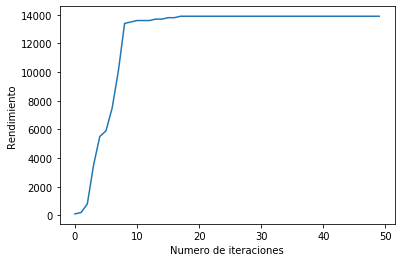

In [58]:
plt.plot(rendim)
plt.ylabel('Rendimiento')
plt.xlabel('Numero de iteraciones')
plt.show()


Normalizamos:


In [20]:
qMatrix=(qMatrix/np.max(qMatrix))*100

Obteniendo así la matriz __Q__ entrenada y normalizada.

Camino eficiente
-----------------------------------------------------------

Último paso será pues, obtener el camino más eficiente hacia el __estado objetivo__ siendo una lista con los estados que llevan desde el __estado inicial__ hasta el objetivo.

Para su ejecución simplemente tendríamos que observar cuál es la acción que nos ofrece una mayor recompensa para cada estado, buscando en la matriz Q. Incluyendo así los estados visitados en una lista.

In [222]:
def findOptimalWay(initialState, Q, objetive):
    #paso1 
    actualState = initialState
    camino = [initialState]
    contador=0
    totalValue=0
    #paso2
    while(actualState!=objetive):
        qRow = Q[actualState]
        maxValue = np.max(qRow)
        maxValueIndex = np.where(qRow == maxValue)
        nextState=maxValueIndex[0][0]
        camino.append(nextState)
        #paso3
        totalValue += maxValue 
        actualState=nextState
        print(actualState)
        contador=contador+1
    return camino, contador, totalValue
    

In [ ]:
initialState = int(input('Seleccione un estado inicial: '))

In [223]:
[camino,contador,totalValue]=findOptimalWay(initialState, qMatrix, objetivo)

2
4
9


In [224]:
camino

[8, 2, 4, 9]